Total points for this HW: 100.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

Your answer here.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

Your answer here.

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

Your answer here.

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [1]:
import pandas as pd
import numpy as np

In [2]:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
#     Python 3 import io
thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [3]:
# your code here
print("( good, bad ) = (",len(df[df.MPG == "good"]),",",len(df[df.MPG == "bad"]),")")

( good, bad ) = ( 5 , 15 )


In [4]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [5]:
def caculate_discrete_gain(df):
    x = ["cylinders", "weight"]
    a = list(df.weight.unique())
    cat = {}
    for i in x:
        cat[i] = list(df[i].unique())
    gain_discrete = {}
    print ("condition,   goodY,  goodN,  badY,  badN")
    for key,items in cat.items():
#     print(key,items)
        for i in items:
            goodY = len(df[(df[key] == i) &(df.MPG == "good")])
            goodN = len(df[(df[key] == i) &(df.MPG == "bad")])
            badY = len(df[(df[key] != i) &(df.MPG == "good")])
            badN = len(df[(df[key] != i) &(df.MPG == "bad")])
            try:
                print(key,"=" ,i[:4] ," ",goodY , "    ",goodN ,"    ", badY,"    ", badN)
            except:
                print(key,"=" ,i ," ",goodY , "    ",goodN ,"    ", badY,"    ", badN)
            x = key +" "+ str(i)
            gain_discrete[x] = InformationGain(goodY, goodN, badY, badN)
    return gain_discrete

In [6]:
gain_discrete = caculate_discrete_gain(df)

condition,   goodY,  goodN,  badY,  badN
cylinders = 4   5      4      0      11
cylinders = 6   0      6      5      9
cylinders = 8   0      5      5      10
weight = ligh   3      3      2      12
weight = medi   2      6      3      9
weight = weig   0      6      5      9


In [7]:
gain_discrete

{'cylinders 4': 0.36529389753193281,
 'cylinders 6': 0.15307795338969116,
 'cylinders 8': 0.12255624891826571,
 'weight light': 0.097107179451503628,
 'weight medium': 0.0,
 'weight weighty': 0.15307795338969116}

c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [8]:
def caculate_value_gain(df):
    nums = sorted(df.HP.unique())
    midpoints = []
# nums
    for i in range(len(nums) - 1):
        midpoints.append(nums[i] + (nums[i+1] - nums[i])/2)
# midpoints
    key = "HP"
    value_gain = {}
    print ("condition,    goodY,  goodN,  badY,  badN")
    for i in midpoints:
        goodY = len(df[(df[key] > i) &(df.MPG == "good")])
        goodN = len(df[(df[key] > i) &(df.MPG == "bad")])
        badY = len(df[(df[key] <= i) &(df.MPG == "good")])
        badN = len(df[(df[key] <= i) &(df.MPG == "bad")])
        print("HP > " ,i , "    ",goodY , "    ",goodN ,"    ", badY,"    ", badN)  
        y = "HP > " + str(i)
        value_gain[y] = InformationGain(goodY, goodN, badY, badN)
    return value_gain

In [9]:
value_gain = caculate_value_gain(df)

condition,    goodY,  goodN,  badY,  badN
HP >  70.0      4      15      1      0
HP >  78.0      3      15      2      0
HP >  83.0      2      15      3      0
HP >  87.0      2      14      3      1
HP >  89.5      1      14      4      1
HP >  91.0      1      13      4      2
HP >  92.5      0      13      5      2
HP >  93.5      0      12      5      3
HP >  94.5      0      11      5      4
HP >  97.5      0      8      5      7
HP >  105.0      0      6      5      9
HP >  124.5      0      5      5      10
HP >  142.0      0      4      5      11
HP >  157.5      0      3      5      12
HP >  172.5      0      2      5      13
HP >  182.5      0      1      5      14


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

In [10]:
def find_max(value_gain, gain_discrete):
    compare = []
    for i in [value_gain, gain_discrete]:
        print(max(i, key=i.get), i[max(i, key=i.get)])
        compare.append((max(i, key=i.get), i[max(i, key=i.get)]))
    if compare[0][1] > compare[1][1]:
        print ("\n Choose: ",compare[0])
        return compare[0]
    else:
        print ("\n Choose: ",compare[1])
        return compare[1]

In [11]:
max_condition = find_max(value_gain, gain_discrete)

HP > 92.5 0.509185925461
cylinders 4 0.365293897532

 Choose:  ('HP > 92.5', 0.50918592546081209)


### Choose HP  to split data!

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [12]:
def split(max_condition):
    key = max_condition[0].split()[0]
    value = float(max_condition[0].split()[2])
    return key, value

In [13]:
key, value = split(max_condition)

goodY = len(df[(df[key] > value) &(df.MPG == "good")])
goodN = len(df[(df[key] > value) &(df.MPG == "bad")])
badY = len(df[(df[key] <= value) &(df.MPG == "good")])
badN = len(df[(df[key] <= value) &(df.MPG == "bad")])
print(goodY, goodN, badY, badN)

0 13 5 2


In [14]:
df_first_split = df[(df[key] <= value)]
df_first_split

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
11,good,4,92,medium
14,good,4,89,medium
15,good,4,65,light
16,bad,6,85,medium
17,good,4,81,light


In [15]:
gain_discrete = caculate_discrete_gain(df_first_split)

condition,   goodY,  goodN,  badY,  badN
cylinders = 4   5      0      0      2
cylinders = 6   0      2      5      0
weight = ligh   3      0      2      2
weight = medi   2      2      3      0


In [16]:
value_gain = caculate_value_gain(df_first_split)

condition,    goodY,  goodN,  badY,  badN
HP >  70.0      4      2      1      0
HP >  78.0      3      2      2      0
HP >  83.0      2      2      3      0
HP >  87.0      2      1      3      1
HP >  89.5      1      1      4      1
HP >  91.0      1      0      4      2


In [30]:
max_condition = find_max(value_gain, gain_discrete)

HP > 83.0 0.291691997138
cylinders 4 0.863120568567

 Choose:  ('cylinders 4', 0.86312056856663089)


### Choose Cylinders: the gain of cylinders = 4 is equal to the gain of cylinders = 6, I choose cylinders = 6

In [19]:
key = "cylinders"
value = 6
df_second_split = df_first_split[(df_first_split[key] == value)]
df_second_split

,MPG,cylinders,HP,weight
1,bad,6,90,medium
16,bad,6,85,medium


f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

In [26]:
from IPython.display import Image

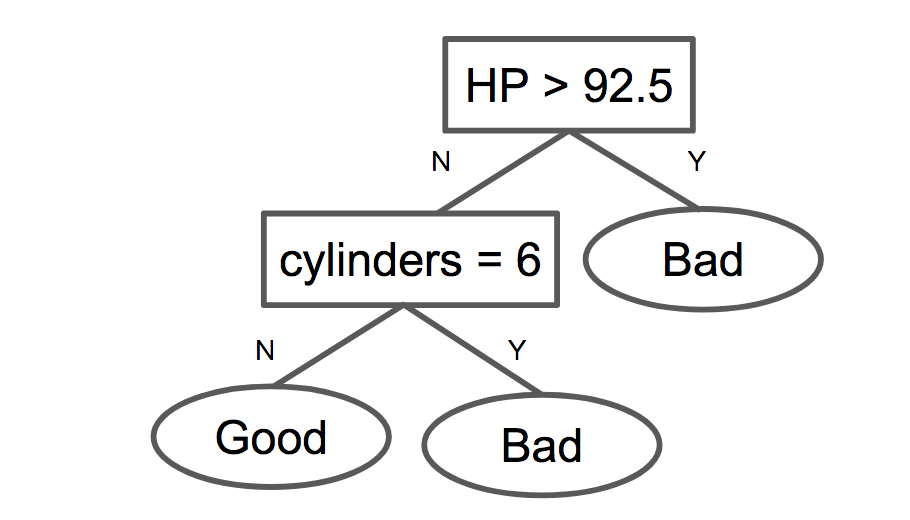

In [29]:
Image("DecisionTree.png")

Your answer here.

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

?,8,70,light

?,6,113,medium

?,4,83,weighty

?,4,95,weighty


In [34]:
def good_bad(vehicles):
    for i in vehicles:
        if int(i[2]) > 92.5:
            i[0] = "bad"
        else:
            if int(i[1]) == 6:
                i[0] = "bad"
            else:
                i[0] = "good"

In [35]:
vehicles = [["?",8,70,"light"],["?",6,113,"medium"],["?",4,83,"weighty"],["?",4,95,"weighty"]]

In [36]:
good_bad(vehicles)
vehicles

[['good', 8, 70, 'light'],
 ['bad', 6, 113, 'medium'],
 ['good', 4, 83, 'weighty'],
 ['bad', 4, 95, 'weighty']]

### Question 3, Predicting burden of disease （40 pts)

In [ ]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# your code here

b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

In [ ]:
import matplotlib.pylab as plt

# your code here

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [ ]:
from sklearn.model_selection import GridSearchCV

# your code here

d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [ ]:
from sklearn import tree

# your code here

thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print thestring

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# your code here

b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

Your answer here.